# **Descubrimiento de nuevos modelos de regresión**

En la unidad 2, hemos visto cómo ajustar una línea recta a los puntos de datos. Sin embargo, la regresión puede ajustarse a muchos tipos de relaciones, incluidas aquellas con varios factores y aquellas en las que la importancia de un factor depende de otro.

## **Experimentación con modelos**

A menudo se eligen los modelos de regresión porque funcionan con muestras de datos pequeñas, son sólidos, fáciles de interpretar y existe una gran variedad.

**La regresión lineal:** es la forma más simple de regresión, sin límite en cuanto al número de características usadas. La regresión lineal se presenta de diversas formas y, a menudo, se las denomina en función del número de características usadas y la forma de la curva que mejor se ajusta.

**Los árboles de decisión:** adoptan un enfoque paso a paso para predecir una variable. Si pensamos en el ejemplo de las bicicletas, el árbol de decisión puede dividir primero los ejemplos entre los que son durante primavera y verano y otoño e invierno, para hacer una predicción basada en el día de la semana. El lunes de primavera y verano puede tener una tasa de alquiler de bicicletas de 100 al día, mientras que el lunes de otoño e invierno puede tener una tasa de alquiler de 20 al día.

**Los algoritmos de conjunto:** construyen no solo un árbol de decisión, sino un gran número de árboles, lo que permite realizar mejores predicciones sobre datos más complejos. Los algoritmos de conjunto, como bosque aleatorio, se usan ampliamente en el aprendizaje automático y en la ciencia debido a sus sólidas capacidades de predicción.

Los científicos de datos suelen experimentar con el uso de modelos diferentes. En el ejercicio siguiente, experimentaremos con diferentes tipos de modelos para comparar su rendimiento con los mismos datos.



---



## **Regresión - Experimentación con modelos adicionales**

En el cuaderno anterior, usamos modelos de regresión simples para observar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este cuaderno, experimentaremos con modelos más complejos para mejorar nuestro rendimiento de regresión.

Comencemos cargando los datos de bicicletas compartidas como un Pandas DataFrame y viendo las primeras filas. También dividiremos nuestros datos en conjuntos de datos de entrenamiento y prueba.

In [1]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

--2023-03-19 02:09:54--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.01s   

2023-03-19 02:09:54 (4.63 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2  

Ahora tenemos los siguientes cuatro conjuntos de datos:

- **X_train :** los valores de características que usaremos para entrenar el modelo
- **y_train :** las etiquetas correspondientes que usaremos para entrenar el modelo
- **X_test :** los valores de características que usaremos para validar el modelo
- **y_test :** Las etiquetas correspondientes que usaremos para validar el modelo.

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento.

### **Experimenta con algoritmos**

El algoritmo de regresión lineal que usamos la última vez para entrenar el modelo tiene cierta capacidad predictiva, pero hay muchos tipos de algoritmos de regresión que podríamos probar, incluidos:

- **Algoritmos lineales :** no solo el algoritmo de regresión lineal que usamos anteriormente (que técnicamente es un algoritmo de mínimos cuadrados ordinarios ), sino otras variantes como Lasso y Ridge .
- **Algoritmos basados en árboles :** algoritmos que construyen un árbol de decisiones para llegar a una predicción.
- **Algoritmos de conjunto :** algoritmos que combinan los resultados de varios algoritmos de base para mejorar la generalización.

> **Nota :** para obtener una lista completa de los estimadores de Scikit-Learn que encapsulan algoritmos para el aprendizaje automático supervisado, consulte la [documentación de Scikit-Learn](https://scikit-learn.org/stable/supervised_learning.html). Hay muchos algoritmos para elegir, pero para la mayoría de los escenarios del mundo real, [la hoja de trucos del estimador de Scikit-Learn](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) puede ayudarlo a encontrar un punto de partida adecuado.

## **Pruebe con otro algoritmo lineal**
Intentemos entrenar nuestro modelo de regresión usando un algoritmo **Lasso**. Podemos hacer esto simplemente cambiando el estimador en el código de entrenamiento.

Lasso() 

MSE: 201155.70593338404
RMSE: 448.5038527519959
R2: 0.6056468637824488


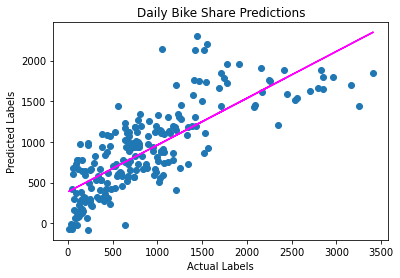

In [2]:
from sklearn.linear_model import Lasso

# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### **Pruebe un algoritmo de árbol de decisión**

Como alternativa a un modelo lineal, existe una categoría de algoritmos para el aprendizaje automático que utiliza un enfoque basado en árboles en el que las características del conjunto de datos se examinan en una serie de evaluaciones, cada una de las cuales da como resultado una rama en un árbol de decisión basado en en el valor de la característica. Al final de cada serie de ramas hay nodos hoja con el valor de etiqueta predicho en función de los valores de las características.

Es más fácil ver cómo funciona esto con un ejemplo. Entrenemos un modelo de regresión de árbol de decisión utilizando los datos de alquiler de bicicletas. Después de entrenar el modelo, el siguiente código imprimirá la definición del modelo y una representación de texto del árbol que usa para predecir los valores de las etiquetas.

In [3]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
model = DecisionTreeRegressor().fit(X_train, y_train)
print (model, "\n")

# Visualize the model tree
tree = export_text(model)
print(tree)

DecisionTreeRegressor() 

|--- feature_6 <= 0.45
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.41
|   |   |   |   |--- feature_1 <= 2.50
|   |   |   |   |   |--- feature_9 <= 0.33
|   |   |   |   |   |   |--- feature_7 <= 0.27
|   |   |   |   |   |   |   |--- value: [515.00]
|   |   |   |   |   |   |--- feature_7 >  0.27
|   |   |   |   |   |   |   |--- value: [558.00]
|   |   |   |   |   |--- feature_9 >  0.33
|   |   |   |   |   |   |--- value: [317.00]
|   |   |   |   |--- feature_1 >  2.50
|   |   |   |   |   |--- feature_8 <= 0.40
|   |   |   |   |   |   |--- feature_9 <= 0.22
|   |   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |   |--- feature_9 >  0.22
|   |   |   |   |   |   |   |--- value: [968.00]
|   |   |   |   |   |--- feature_8 >  0.40
|   |   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |   |--- value: [710.00]
|   |   |   |   |   |   |--- feature_3 >  3.00
|   |   |   |   |   |   |   |--- val


Así que ahora tenemos un modelo basado en árboles; pero es bueno? Vamos a evaluarlo con los datos de prueba.

MSE: 243214.07272727272
RMSE: 493.16738814247714
R2: 0.5231940754193349


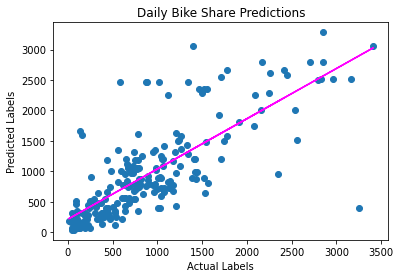

In [4]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

El modelo basado en árboles no parece haber mejorado con respecto al modelo lineal, entonces, ¿qué más podemos probar?

### **Pruebe un algoritmo de conjunto**

Los algoritmos de conjunto funcionan mediante la combinación de múltiples estimadores base para producir un modelo óptimo, ya sea aplicando una función agregada a una colección de modelos base (a veces denominada embolsado ) o construyendo una secuencia de modelos que se complementan entre sí para mejorar el rendimiento predictivo ( conocido como refuerzo ).

Por ejemplo, probemos un modelo de bosque aleatorio, que aplica una función de promedio a varios modelos de árboles de decisión para obtener un mejor modelo general.



RandomForestRegressor() 

MSE: 109121.4771040909
RMSE: 330.33540092471304
R2: 0.7860741929988264


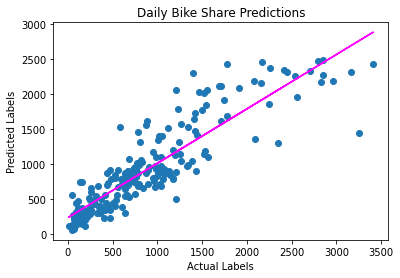

In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


Por si acaso, probemos también un algoritmo de conjunto potenciador . Usaremos un estimador de Gradient Boosting, que como un algoritmo Random Forest construye múltiples árboles, pero en lugar de construirlos todos de forma independiente y tomar el resultado promedio, cada árbol se construye sobre los resultados del anterior en un intento de reducir gradualmente el pérdida (error) en el modelo.

GradientBoostingRegressor() 

MSE: 104472.89694592255
RMSE: 323.2226739353577
R2: 0.7951874426370915


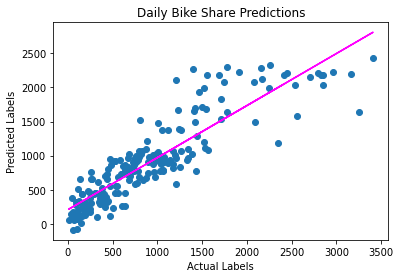

In [6]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

**Resumen**

Aquí hemos probado una serie de nuevos algoritmos de regresión para mejorar el rendimiento. En nuestro cuaderno, veremos cómo "ajustar" estos algoritmos para mejorar el rendimiento.

**Otras lecturas**

Para obtener más información sobre Scikit-Learn, consulte la [documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) .